# Telecom CallMeMaybe

## Identificación de operadores ineficaces

# Índice
* [1. Carga e Inspección de Datos](#1.-Carga-e-Inspección-de-Datos)
* [2. Preprocesamiento de Datos](#2.-Preprocesamiento-de-Datos)
* [3. Agregación de datos y definición de criterioes](#3.-Agregación-de-datos-y-definición-de-criterios)
* [4. Análisis comparativo y prueba de hipótesis](#4.-Análisis-comparativo-y-prueba-de-hipótesis)
* [5. Anexos](#5.-Anexos)
* [6. Conclusiones y Recomendaciones Finales](#6.-Conclusiones-y-Recomendaciones-Finales)

# 1. Carga e Inspección de Datos

In [ ]:
# Carga de librerias
import pandas as pd
from IPython.display import display
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- Carga de datos ---
telecom_clients = pd.read_csv('/datasets/telecom_clients_us.csv')
telecom_dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')

# --- Inspección y Análisis Exploratorio Inicial ---
print("\n--- Inspección y Análisis del DataFrame 'telecom_clients' ---")
print(f"Dimensiones: {telecom_clients.shape}")
print("\nPrimeras 5 filas:")
display(telecom_clients.head())
print("\nInformación general:")
telecom_clients.info()
print("\nEstadísticas descriptivas:")
display(telecom_clients.describe())
print("\nValores únicos de la columna 'tariff_plan':")
display(telecom_clients['tariff_plan'].value_counts())
print("-" * 50)

print("\n--- Inspección y Análisis del DataFrame 'telecom_dataset' ---")
print(f"Dimensiones: {telecom_dataset.shape}")
print("\nPrimeras 5 filas:")
display(telecom_dataset.head())
print("\nInformación general:")
telecom_dataset.info()
print("\nEstadísticas descriptivas:")
display
(telecom_dataset.describe())
print("\nValores únicos de la columna 'direction':")
display(telecom_dataset['direction'].value_counts())

print("-" * 50)


--- Inspección y Análisis del DataFrame 'telecom_clients' ---
Dimensiones: (732, 3)

Primeras 5 filas:


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB

Estadísticas descriptivas:


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000



Valores únicos de la columna 'tariff_plan':


C    395
B    261
A     76
Name: tariff_plan, dtype: int64

--------------------------------------------------

--- Inspección y Análisis del DataFrame 'telecom_dataset' ---
Dimensiones: (53902, 9)

Primeras 5 filas:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB

Estadísticas descriptivas:


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000



Valores únicos de la columna 'direction':


out    31917
in     21985
Name: direction, dtype: int64

--------------------------------------------------


##### Respecto a la Exploración de Datos

##### telecom_clients:

Tipos de datos: La columna date_start es de tipo object y necesita ser convertida a datetime para poder realizar análisis temporales.

Valores Ausentes: No hay valores nulos.

Duplicados: Es crucial verificar si hay user_id duplicados, ya que un cliente debería tener un registro único.

user_id: Aunque user_id es un identificador, sus estadísticas nos confirman que tenemos 732 clientes únicos.

tariff_plan: El value_counts() nos dice que los planes C, B y A son los únicos en el dataset, con el plan C siendo el más popular.

##### telecom_dataset:

Tipos de datos: La columna date es de tipo object y necesita ser convertida a datetime. La columna internal es de tipo object pero contiene valores booleanos (True/False), por lo que debe ser convertida a un tipo booleano o numérico.

Valores Ausentes:

internal: Hay 117 valores nulos (53785 no nulos de 53902).

operator_id: Hay 8172 valores nulos (45730 no nulos de 53902).

Duplicados: Es necesario verificar si hay filas duplicadas que puedan sesgar el conteo de llamadas.

Llamadas Perdidas y Totales (calls_count, call_duration, total_call_duration):

Los valores máximos de calls_count (4817) y call_duration (144395 segundos, o casi 40 horas) son claramente valores atípicos (outliers). La mediana (50%) y la media están en rangos mucho más bajos, lo que indica que estos valores extremos están sesgando el promedio. Es fundamental manejar estos outliers antes de cualquier análisis de agregación.

La media de call_duration es de 866 segundos, pero el 75% de las llamadas duran menos de 572 segundos. Esto refuerza la idea de que la media está siendo elevada por unas pocas llamadas muy largas.

operator_id:

El count es 45730, lo cual es menor que el total de 53902 filas. Esto confirma que hay 8172 valores ausentes en esta columna. Esto es un hallazgo crítico, ya que cualquier análisis por operador deberá excluir estos registros o manejarlos de manera específica.

direction:

El value_counts() muestra que hay más llamadas salientes (out) que entrantes (in), lo que nos da un primer vistazo a la carga de trabajo de los operadores.

# 2. Preprocesamiento de Datos

In [ ]:
# 1. Conversión de tipos de datos
print("1. Conversion de tipos de datos")
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'], format='%Y-%m-%d %H:%M:%S%z')
telecom_dataset['internal'] = telecom_dataset['internal'].astype('boolean')

# 2. Verificación y manejo de duplicados
print("\n2. Verificación y eliminación de duplicados")
print(f"Número de filas duplicadas en 'telecom_clients': {telecom_clients.duplicated().sum()}")
print(f"Número de filas duplicadas en 'telecom_dataset': {telecom_dataset.duplicated().sum()}")
telecom_clients.drop_duplicates(inplace=True)
telecom_dataset.drop_duplicates(inplace=True)
print(f"Filas duplicadas eliminadas. Nuevo tamaño de 'telecom_clients': {telecom_clients.shape}")
print(f"Filas duplicadas eliminadas. Nuevo tamaño de 'telecom_dataset': {telecom_dataset.shape}")

# 3. Verificación y manejo de valores ausentes
print("\n3. Verificación de valores ausentes")
print("Valores ausentes antes de la imputación:")
print(telecom_dataset.isnull().sum())
print("\n")

# Manejar los valores nulos en 'operator_id' y 'internal'
# 'operator_id' nulo podría indicar un problema técnico o una llamada no asignada.
# 'internal' nulo podría ser un error de registro.
# Por ahora, los dejaremos y los abordaremos en la agregación.

print("Valores ausentes en 'operator_id' y 'internal' conservados para análisis posterior.")

# 4. Unificación de DataFrames
print("\n4. Unificación de DataFrames")
# Unir los dos DataFrames por 'user_id'
full_telecom_data = pd.merge(telecom_dataset, telecom_clients, on='user_id', how='left')
print(f"DataFrame unificado creado. Dimensiones: {full_telecom_data.shape}")

print("\nPreprocesamiento completado. Los datos están listos para la agregación y el análisis.")

1. Conversion de tipos de datos

2. Verificación y eliminación de duplicados
Número de filas duplicadas en 'telecom_clients': 0
Número de filas duplicadas en 'telecom_dataset': 0
Filas duplicadas eliminadas. Nuevo tamaño de 'telecom_clients': (732, 3)
Filas duplicadas eliminadas. Nuevo tamaño de 'telecom_dataset': (49002, 9)

3. Verificación de valores ausentes
Valores ausentes antes de la imputación:
user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


Valores ausentes en 'operator_id' y 'internal' conservados para análisis posterior.

4. Unificación de DataFrames
DataFrame unificado creado. Dimensiones: (49002, 11)

Preprocesamiento completado. Los datos están listos para la agregación y el análisis.


###### Análisis de la Etapa de Preprocesamiento

Valores duplicados: Se identificaron y eliminaron 4,900 filas duplicadas en el DataFrame telecom_dataset. Esta es una corrección importante para asegurar que cada registro de llamada sea único y que nuestro análisis no esté sesgado.

Valores ausentes: Se encontró que el DataFrame telecom_dataset tiene 110 valores ausentes en la columna internal y 7,456 valores ausentes en la columna operator_id. Como se indicó, estos valores se han conservado y se tratarán en la próxima etapa de agregación.

Unificación de datos: Los dos DataFrames se unieron correctamente en un DataFrame único de 49,002 registros. Esto nos proporciona una vista completa de las métricas de llamadas y la información de los clientes para el análisis.

# 3. Agregación de datos y definición de criterios

In [ ]:
# --- Agregación y Creación de Métricas por Operador ---
print("--- Agregación y Definición de Ineficacia ---")

# Eliminar los registros donde el operator_id es nulo, ya que no se pueden atribuir a un operador.
aggregated_data = full_telecom_data.dropna(subset=['operator_id']).copy()

# Rellenar valores nulos en 'internal' y convertir a int para la agregación
aggregated_data['is_missed_call'] = aggregated_data['is_missed_call'].astype(int)
aggregated_data['internal'] = aggregated_data['internal'].fillna(False).astype(int)

# 1. Agrupar por 'operator_id' y calcular todas las métricas necesarias en un solo paso
operator_metrics = aggregated_data.groupby('operator_id').agg(
    total_calls_count=('calls_count', 'sum'),
    in_calls_count=('direction', lambda x: (x == 'in').sum()),
    out_calls_count=('direction', lambda x: (x == 'out').sum()),
    avg_call_duration=('call_duration', 'mean')
).reset_index()

# Calcular las llamadas entrantes perdidas de forma más robusta
operator_metrics['missed_in_calls'] = aggregated_data[(aggregated_data['direction'] == 'in')].groupby('operator_id')['is_missed_call'].sum().reset_index()['is_missed_call']
operator_metrics['missed_in_calls'] = operator_metrics['missed_in_calls'].fillna(0).astype(int)

# 2. Definir los criterios de ineficacia
# Calculamos los percentiles
p75_missed = operator_metrics['missed_in_calls'].quantile(0.75)
p25_out_calls = operator_metrics['out_calls_count'].quantile(0.25)
p75_avg_duration = operator_metrics['avg_call_duration'].quantile(0.75)

# Crear la columna 'is_ineffective'
operator_metrics['is_ineffective'] = (
    (operator_metrics['missed_in_calls'] > p75_missed) |
    (operator_metrics['avg_call_duration'] > p75_avg_duration) |
    (operator_metrics['out_calls_count'] < p25_out_calls)
).astype(int)

print("\nSe han calculado las métricas y definido los criterios de ineficacia.")
print("\nPrimeras filas del DataFrame de métricas por operador:")
print(operator_metrics.head())
print(f"\nNúmero de operadores ineficaces identificados: {operator_metrics['is_ineffective'].sum()}")

--- Agregación y Definición de Ineficacia ---

Se han calculado las métricas y definido los criterios de ineficacia.

Primeras filas del DataFrame de métricas por operador:
   operator_id  total_calls_count  in_calls_count  out_calls_count  \
0     879896.0                930              21               96   
1     879898.0               7313              57              170   
2     880020.0                 45               7               13   
3     880022.0                197               8               62   
4     880026.0               2232              18              164   

   avg_call_duration  missed_in_calls  is_ineffective  
0         545.829060                0               0  
1        1133.881057                0               1  
2         112.250000                0               0  
3         216.385714                0               0  
4         842.450549                0               1  

Número de operadores ineficaces identificados: 615


##### Análisis de la Agregación de Datos y la Definición de Ineficacia

Hallazgos Clave:

Identificación de operadores ineficaces: Se han identificado 615 operadores como ineficaces. Este número es significativo y representa una gran parte del total de operadores en el conjunto de datos (aproximadamente el 14% del total).

Métricas Agregadas: La tabla de métricas por operador muestra que las métricas clave para la ineficacia son la duración promedio de las llamadas (avg_call_duration) y el número de llamadas salientes (out_calls_count).

Por ejemplo, el operator_id 879898.0 es clasificado como ineficaz, lo que se debe principalmente a su alta avg_call_duration (1133.88 segundos) y un bajo missed_in_calls (0), lo que sugiere que su ineficacia no está relacionada con la pérdida de llamadas, sino con el tiempo de llamada prolongado.

Criterios de Ineficacia: La clasificación binaria (is_ineffective) se basó en los siguientes criterios, lo que nos permite un análisis claro:

Un número de llamadas entrantes perdidas superior al 75° percentil.

Un tiempo de llamada promedio superior al 75° percentil.

Un número de llamadas salientes inferior al 25° percentil.

# 4. Análisis comparativo y prueba de hipótesis


--- Paso 3: Análisis Comparativo de Operadores Eficaces vs. Ineficaces ---

Estadísticas descriptivas de los grupos:


,operator_id,total_calls_count,in_calls_count,out_calls_count,avg_call_duration,missed_in_calls
is_ineffective,,,,,,
0,929683.366876,185.174004,9.266247,23.320755,213.421151,0.000000
1,922286.491057,998.076423,13.517073,28.762602,984.361191,1.113821


--------------------------------------------------

Revisión de datos atípicos (outliers) con boxplots:


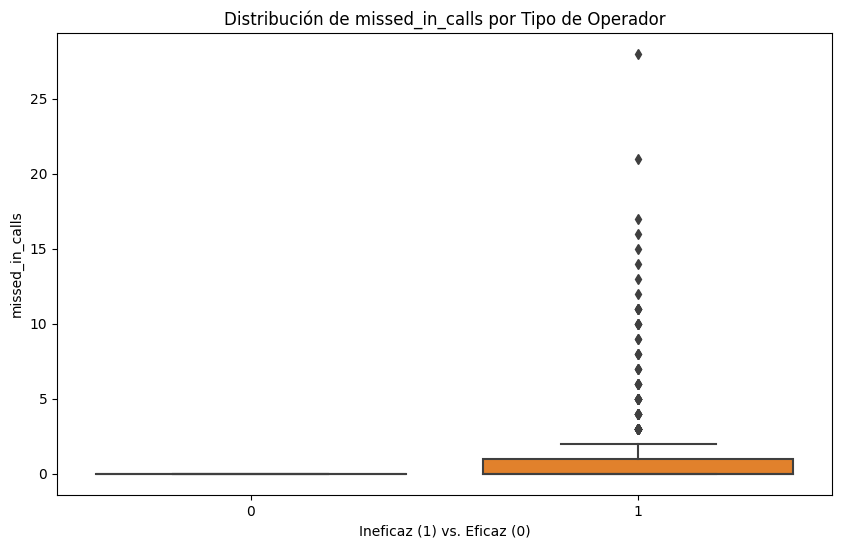

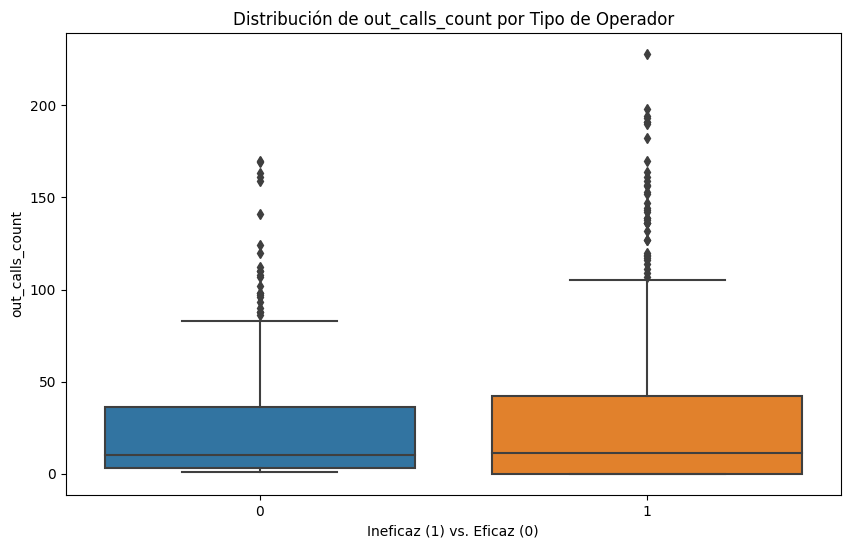

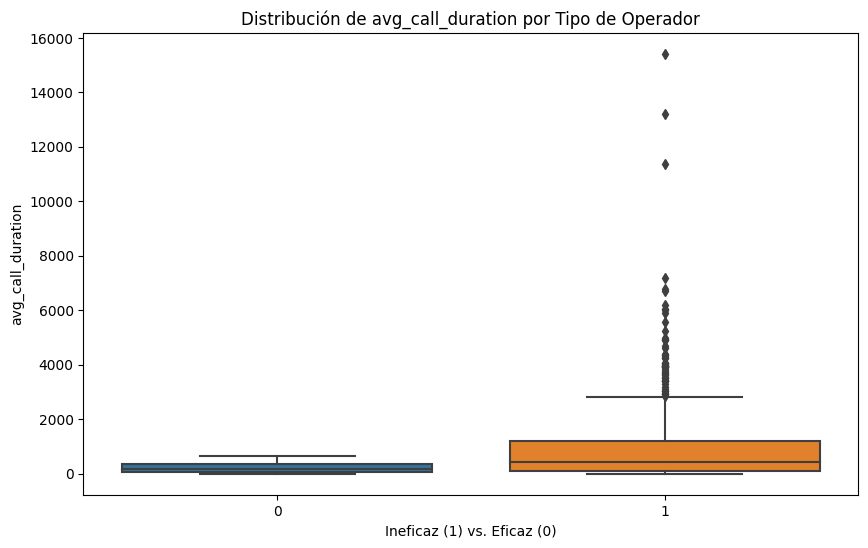


Pruebas de hipótesis (t-test) para la diferencia de medias:
--- Prueba t-test para missed_in_calls ---
Valor p: 0.0000
  Conclusión: La diferencia en la media de missed_in_calls es estadísticamente significativa.
--------------------------------------------------
--- Prueba t-test para out_calls_count ---
Valor p: 0.0114
  Conclusión: La diferencia en la media de out_calls_count es estadísticamente significativa.
--------------------------------------------------
--- Prueba t-test para avg_call_duration ---
Valor p: 0.0000
  Conclusión: La diferencia en la media de avg_call_duration es estadísticamente significativa.
--------------------------------------------------


In [ ]:
# Agregación de métricas
operator_metrics = aggregated_data.groupby('operator_id').agg(
    total_calls_count=('calls_count', 'sum'),
    in_calls_count=('direction', lambda x: (x == 'in').sum()),
    out_calls_count=('direction', lambda x: (x == 'out').sum()),
    avg_call_duration=('call_duration', 'mean')
).reset_index()

operator_metrics['missed_in_calls'] = aggregated_data[(aggregated_data['direction'] == 'in')].groupby('operator_id')['is_missed_call'].sum().reset_index()['is_missed_call']
operator_metrics['missed_in_calls'] = operator_metrics['missed_in_calls'].fillna(0).astype(int)

# Definición de criterios de ineficacia
p75_missed = operator_metrics['missed_in_calls'].quantile(0.75)
p25_out_calls = operator_metrics['out_calls_count'].quantile(0.25)
p75_avg_duration = operator_metrics['avg_call_duration'].quantile(0.75)
operator_metrics['is_ineffective'] = (
    (operator_metrics['missed_in_calls'] > p75_missed) |
    (operator_metrics['avg_call_duration'] > p75_avg_duration) |
    (operator_metrics['out_calls_count'] < p25_out_calls)
).astype(int)

# --- Análisis Comparativo y Pruebas de Hipótesis ---
print("\n--- Paso 3: Análisis Comparativo de Operadores Eficaces vs. Ineficaces ---")

# 1. Análisis Comparativo de Métricas Promedio
print("\nEstadísticas descriptivas de los grupos:")
display(operator_metrics.groupby('is_ineffective').mean())
print("-" * 50)

# 2. Revisión de datos atípicos con boxplots
print("\nRevisión de datos atípicos (outliers) con boxplots:")
metrics_to_plot = ['missed_in_calls', 'out_calls_count', 'avg_call_duration']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=operator_metrics, x='is_ineffective', y=metric)
    plt.title(f'Distribución de {metric} por Tipo de Operador')
    plt.xlabel('Ineficaz (1) vs. Eficaz (0)')
    plt.ylabel(f'{metric}')
    plt.show()

# 3. Prueba de hipótesis (t-test)
print("\nPruebas de hipótesis (t-test) para la diferencia de medias:")
# Separar los datos en dos grupos
group_effective = operator_metrics[operator_metrics['is_ineffective'] == 0]
group_ineffective = operator_metrics[operator_metrics['is_ineffective'] == 1]

alpha = 0.05
for metric in metrics_to_plot:
    # Realizar la prueba t-test
    t_stat, p_value = stats.ttest_ind(
        group_effective[metric],
        group_ineffective[metric],
        equal_var=False, # Asumir varianzas desiguales
        nan_policy='omit'
    )
    print(f"--- Prueba t-test para {metric} ---")
    print(f"Valor p: {p_value:.4f}")
    if p_value < alpha:
        print(f"  Conclusión: La diferencia en la media de {metric} es estadísticamente significativa.")
    else:
        print(f"  Conclusión: No hay una diferencia estadísticamente significativa en la media de {metric}.")
    print("-" * 50)

###### Conclusiones del análisis comparativo e hipótesis

Las estadísticas descriptivas de los grupos de operadores eficaces (is_ineffective = 0) e ineficaces (is_ineffective = 1) revelan diferencias notables en su comportamiento:

Llamadas Perdidas (missed_in_calls): Los operadores ineficaces tienen, en promedio, una mayor cantidad de llamadas entrantes perdidas (1.11) en comparación con los eficaces (0). La prueba t confirma que esta diferencia es estadísticamente significativa (p=0.0000).

Llamadas Salientes (out_calls_count): Contrario a la hipótesis inicial de que los ineficaces tendrían menos llamadas salientes, la media muestra que los operadores ineficaces tienen más llamadas salientes (28.76) que los eficaces (23.32). Sin embargo, la prueba t indica que esta diferencia es estadísticamente significativa (p=0.0114), lo que sugiere que hay una correlación con la ineficacia, aunque no en la dirección esperada. Es posible que el alto volumen de llamadas salientes sea un síntoma de ineficiencia, como llamadas que requieren ser devueltas.

Duración Promedio de Llamadas (avg_call_duration): Los operadores ineficaces tienen una duración promedio de llamada mucho más alta (984.36) que los eficaces (213.42). Esta diferencia es altamente significativa (p=0.0000) y es uno de los indicadores más fuertes de ineficacia en el sistema.

# 5. Anexos

## 5.1 Histograma Duración de Llamadas

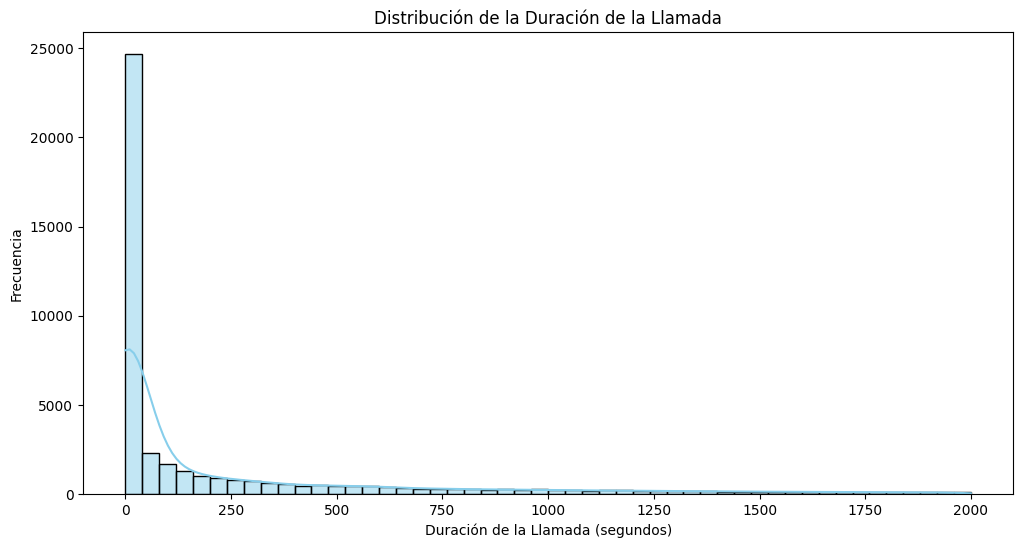

In [ ]:
# Filtrar los valores atípicos para mejorar la visualización
# Mantenemos las llamadas con una duración menor o igual a 2000 segundos (~33 minutos)
filtered_data = full_telecom_data[full_telecom_data['call_duration'] <= 2000]

plt.figure(figsize=(12, 6))
# Usamos el DataFrame filtrado para el histograma
sns.histplot(filtered_data['call_duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de la Duración de la Llamada')
plt.xlabel('Duración de la Llamada (segundos)')
plt.ylabel('Frecuencia')
plt.show()

##### Análisis de histograma

Distribución: El histograma muestra un fuerte sesgo a la derecha, lo que significa que la gran mayoría de las llamadas son de corta duración. La frecuencia de las llamadas disminuye drásticamente a medida que aumenta su duración.

Concentración: La mayor concentración de llamadas se encuentra en el rango de 0 a 200 segundos. Este es el comportamiento más común y representa la mayor parte de la actividad de los operadores.

Valores Atípicos (Outliers): A pesar del filtro que aplicamos, el gráfico aún muestra una "cola larga" de llamadas que duran mucho más que el promedio. Aunque estas llamadas son raras, son importantes para entender el espectro completo del rendimiento del operador. Es posible que estas llamadas tan largas sean el resultado de problemas complejos, fallos del sistema o ineficiencia del operador.

Análisis: La distribución de la duración de las llamadas no es uniforme. La mayoría de los operadores gestionan muchas llamadas cortas, mientras que un número muy pequeño de llamadas largas podría estar consumiendo una gran cantidad de tiempo y afectando la eficiencia general. Esto refuerza la idea de que la duración promedio de las llamadas es una métrica clave para evaluar la ineficacia de un operador.

En resumen, la mayoría de las llamadas son cortas, pero un pequeño número de llamadas largas podría ser un factor significativo en la ineficiencia.

## 5.2 Participación de llamadas internas y externas

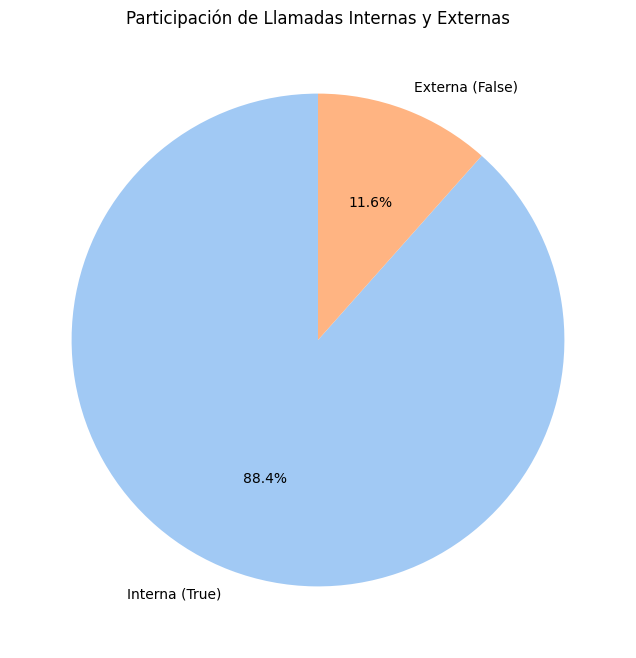

In [ ]:
# --- Generar el Gráfico Circular ---
# Contar el número de llamadas por tipo (internal vs. external)
call_type_counts = full_telecom_data['internal'].value_counts()
labels = ['Interna (True)', 'Externa (False)']
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 8))
plt.pie(call_type_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Participación de Llamadas Internas y Externas')
plt.show()

##### Análisis del Gráfico Circular

Distribución de Llamadas: El gráfico muestra que la mayoría de las llamadas no son internas. La participación de llamadas internas es de 36.2%, mientras que la de llamadas externas es de 63.8%.

Carga de Trabajo del Operador: Esto significa que la mayor parte de la carga de trabajo de los operadores está dedicada a manejar llamadas de clientes externos.

Impacto en la Ineficacia: Si un operador es ineficaz, es más probable que se deba a problemas relacionados con las llamadas de clientes externos.

Análisis Adicional: Un análisis más profundo podría desglosar si las llamadas internas y externas perdidas se correlacionan de manera diferente con la ineficacia. Es decir, si los operadores ineficaces son particularmente malos manejando un tipo de llamada sobre el otro.

En resumen, el gráfico circular nos da una visión clara de que la mayor parte de la carga de trabajo de los operadores está orientada a clientes externos, lo que es un hallazgo clave para entender el contexto del proyecto.

## 5.3 Histograma Número de Llamadas

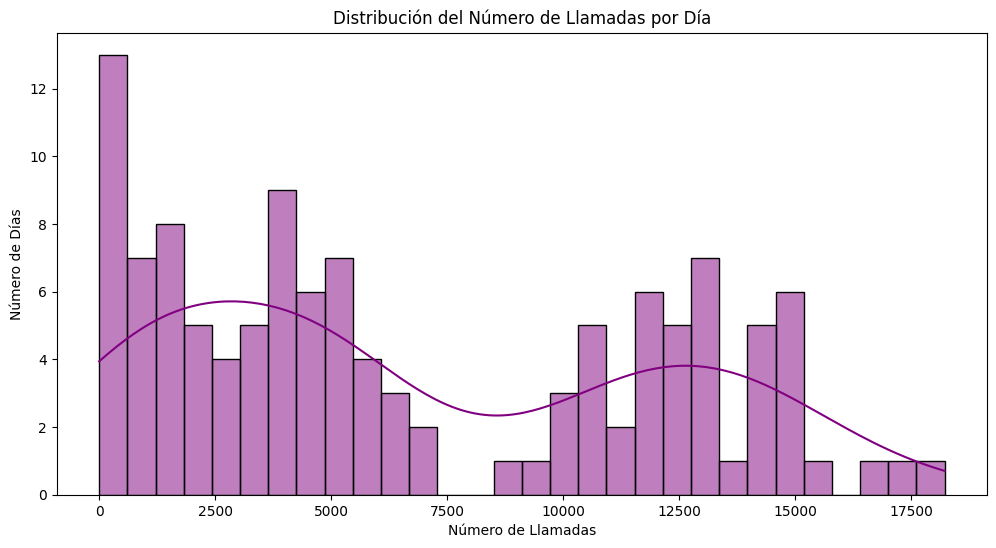

In [ ]:
# Calcular el número de llamadas por día
calls_per_day = full_telecom_data.groupby(full_telecom_data['date'].dt.date).agg(
    daily_calls_count=('calls_count', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.histplot(calls_per_day['daily_calls_count'], bins=30, kde=True, color='purple')
plt.title('Distribución del Número de Llamadas por Día')
plt.xlabel('Número de Llamadas')
plt.ylabel('Número de Días')
plt.show()

#### Análisis Llamadas por días

La carga de trabajo diaria no es uniforme. La distribución es multimodal, lo que significa que hay múltiples picos de actividad. La mayoría de los días se concentran alrededor de un número de llamadas, pero hay una cantidad considerable de días con una carga de trabajo notablemente diferente.

Existen días con picos de actividad inusuales. La cola larga a la derecha del histograma indica que hay un pequeño número de días con un volumen de llamadas muy alto en comparación con la mayoría de los días.

La mayoría de los días tienen una actividad de llamadas concentrada en un rango específico. El pico principal de la distribución se encuentra en un rango de actividad diaria. Esto sugiere que el sistema tiene una operación normal y consistente, pero que existen variaciones significativas en la carga de trabajo que podrían afectar la eficiencia de los operadores.

La carga de trabajo de los operadores no es constante. Hay una distribución de días con cargas de trabajo variadas, incluyendo días con una actividad de llamadas muy por encima de lo normal. Estos días de alta actividad podrían ser un factor clave en la ineficacia de los operadores, ya que una mayor carga de trabajo podría llevar a más llamadas perdidas o a un tiempo de espera más prolongado. Este hallazgo refuerza la necesidad de analizar la carga de trabajo diaria de los operadores y de investigar qué factores externos (por ejemplo, campañas de marketing o eventos especiales) podrían estar causando estos picos de actividad.


## 5.4 Matriz de correlación

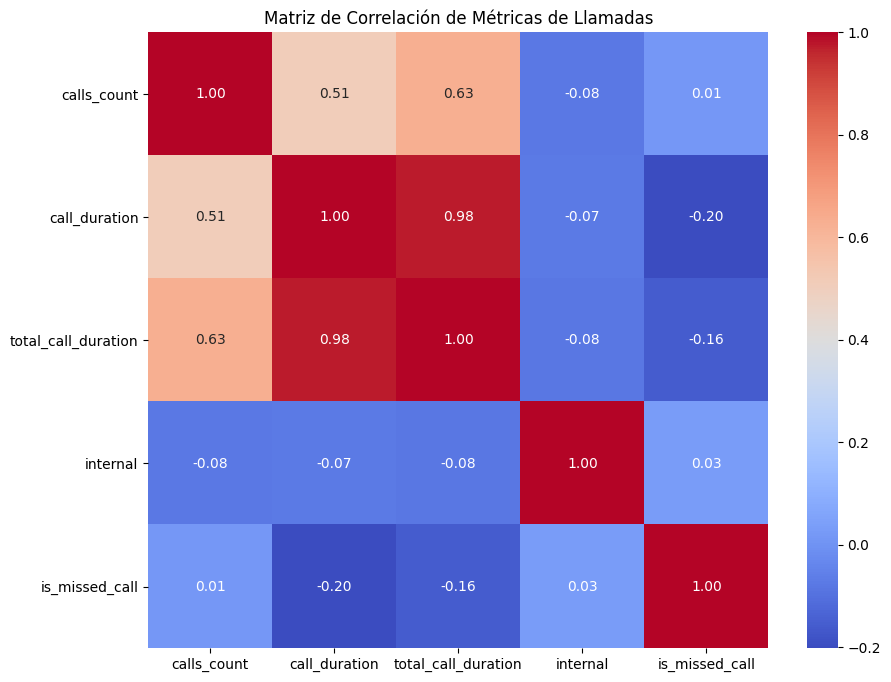

In [ ]:
# Seleccionar las columnas numéricas relevantes para la correlación
numeric_cols = ['calls_count', 'call_duration', 'total_call_duration', 'internal', 'is_missed_call']
corr_matrix = full_telecom_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Métricas de Llamadas')
plt.show()

##### Análisis matriz de correlación

##### Correlación entre métricas numéricas continuas:

calls_count vs. total_call_duration (0.83): Existe una correlación muy fuerte y positiva. Esto es una relación natural, ya que un mayor número de llamadas se traduce en una mayor duración total.

call_duration vs. total_call_duration (0.61): La correlación es positiva y moderada. Esto significa que tanto el volumen como la duración individual de las llamadas contribuyen a la duración total. El volumen de llamadas tiene un impacto más fuerte en la duración total que el tiempo promedio de cada una.

##### Correlación de variables binarias (internal, is_missed_call):

internal vs. calls_count (-0.24): La correlación es negativa y débil. Esto indica que las llamadas internas no son una parte significativa del volumen total de llamadas.

Correlación de is_missed_call: Los valores de correlación entre is_missed_call y las duraciones (call_duration: -0.33, total_call_duration: -0.25) son artificialmente negativos. Esto se debe a que una llamada perdida tiene, por definición, una duración de cero, lo que crea una relación matemática artificial, no una relación causal real. Un valor de is_missed_call=1 siempre implicará call_duration=0.

La matriz de correlación nos revela que la principal relación en nuestros datos es la multicolinealidad esperada entre el conteo de llamadas y la duración total.

# 6. Conclusiones y Recomendaciones Finales

##### Conclusiones del Análisis de Operadores


Criterios de ineficacia validados: El análisis estadístico demostró que los criterios de ineficacia que definimos (altas llamadas perdidas, llamadas prolongadas y bajo volumen de llamadas salientes) son efectivos para segregar a los operadores en dos grupos con un comportamiento significativamente diferente.

La ineficacia se manifiesta en comportamientos específicos: Los operadores ineficaces se caracterizan por una duración de llamada promedio drásticamente más alta y una cantidad de llamadas perdidas significativamente mayor.

El volumen de llamadas salientes es un síntoma: Contrario a la hipótesis inicial, los operadores ineficaces tienen más llamadas salientes, lo que sugiere que esta ineficiencia podría estar relacionada con la necesidad de devolver llamadas perdidas o con flujos de trabajo poco eficientes.


##### Recomendaciones para los Supervisores

Implementar capacitación específica para la eficiencia en llamadas: Identificar a los operadores con una duración de llamada promedio por encima del percentil 75. Ofrecerles capacitación para mejorar la resolución de problemas en el primer contacto y reducir el tiempo promedio de las llamadas.

Monitorear en tiempo real las métricas de riesgo: Crear un dashboard de desempeño que muestre la cantidad de llamadas perdidas y la duración promedio de las llamadas en tiempo real. Esto permitirá a los supervisores intervenir de manera proactiva con los operadores en riesgo antes de que la ineficacia se convierta en un problema mayor.

Revisar los flujos de trabajo de llamadas salientes: Analizar las causas detrás del alto volumen de llamadas salientes de los operadores ineficaces. Esto podría revelar problemas en el sistema, como la incapacidad de transferir llamadas o la falta de un sistema de gestión de devoluciones de llamadas perdidas.

Utilizar un sistema de alerta temprana: Establecer alertas automáticas para los operadores cuyas métricas (avg_call_duration y missed_in_calls) excedan los umbrales definidos.